**LAB-07 & 08: Linear Discriminant Analysis(LDA) and Logistic Regression**

---



* Created Date: 04.04.2024
* Created By: Blessy Louis(2348416)
* edited on: 04.04.2024

# **Import Libraries**



1. **Pandas**: Pandas is a powerful library for data manipulation and analysis. It provides data structures like DataFrame and Series, which are highly efficient for handling structured data.

2. **NumPy**: NumPy is a fundamental package for scientific computing with Python. It provides support for arrays, matrices, and mathematical functions, making it essential for numerical operations and data manipulation.

3. **Seaborn**: Seaborn is a statistical data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

4. **Matplotlib**: Matplotlib is a comprehensive library for creating static, interactive, and animated visualizations in Python. It provides a wide variety of plotting functions and customization options.

5. **Scikit-learn (sklearn)**: Scikit-learn is a machine learning library that provides simple and efficient tools for data mining and data analysis. It features various algorithms for classification, regression, clustering, dimensionality reduction, and more.

6. **Yellowbrick**: Yellowbrick is a visualization library that extends the Scikit-learn API to enable visual model selection and diagnostics. It provides a suite of visualizers to support feature analysis, model evaluation, and hyperparameter tuning.



In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix


# **Load Dataset**


The dataset is related to student performance and contains several columns describing various attributes of students.

* Gender: This column likely represents the gender of the students, which could be categorized as male or female.

* Race/Ethnicity: This column likely represents the racial or ethnic background of the students. It may contain categories such as Group-A,B,C,D
* Parental Level of Education: This column likely describes the educational attainment of the students' parents. It may include categories such as high school, some college, bachelor's degree, master's degree, etc.

* Lunch: This column could indicate whether the student receives free/reduced-price lunch or pays for the lunch. It may have categories like free/reduced or standard.

* Test Preparation Course: This column might indicate whether the student completed a test preparation course before taking the exam. It may have categories like completed or none.

* Math Score, Reading Score, Writing Score: These columns likely represent the scores obtained by students in different subjects (math, reading, and writing). These scores could be numerical values ranging from 0 to 100.

In [11]:
df=pd.read_csv('StudentsPerformance.csv')

# **EDA**

**Displaying first 5 rows of the dataset**

In [12]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75



1. **Gender**: The first student is female. This indicates that the student is female.

2. **Race/Ethnicity**: The student belongs to Group B in terms of race/ethnicity. The dataset likely categorizes students into different racial or ethnic groups, with Group B being one of them.

3. **Parental Level of Education**: The parental level of education for this student is "bachelor's degree." This indicates that at least one of the student's parents has completed a bachelor's degree.

4. **Lunch**: The student's lunch status is "standard." This suggests that the student pays for the standard lunch rather than receiving free or reduced-price lunch.

5. **Test Preparation Course**: The student did not complete any test preparation course, as indicated by "none."

6. **Math Score, Reading Score, Writing Score**: The student scored 72 in Math, 72 in Reading, and 74 in Writing. These scores represent the student's performance in these subjects, likely on a scale from 0 to 100.

Overall, this row provides information about a female student from Group B, whose parent(s) have a bachelor's degree. The student pays for standard lunch, did not complete a test preparation course, and achieved scores of 72 in Math, 72 in Reading, and 74 in Writing.

In [13]:
df.shape

(1000, 8)

The dataset contains 1000 rows and 8 features/cloumns


---

**Data Description: Features in the data**

In [14]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**Checking for null values**

In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

clearly , we see that the dataset have no null values , since the count of the number of null values for each feature is zero.

**Displaying the information about the data**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


This description provides important information about the dataset structure:

1. **Number of Entries**: The dataset contains 1000 entries (rows).

2. **RangeIndex**: The RangeIndex indicates that the index for the dataset ranges from 0 to 999.

3. **Data Columns**: There are 8 columns in the dataset.

   a. **Column Names**: Each column is labeled with a specific name, such as 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', and 'writing score'.
   
   b. **Non-Null Count**: This specifies the number of non-null (non-missing) values present in each column. In this case, all columns have 1000 non-null entries, indicating no missing data.

   c. **Data Type (Dtype)**: The data type of each column is provided. Columns 'math score', 'reading score', and 'writing score' are of integer type (int64), while the other columns ('gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course') are of object type, indicating they likely contain categorical data.

4. **Memory Usage**: The memory usage of the DataFrame is also provided, indicating that it occupies approximately 62.6 KB of memory.

Overall, this description gives a concise overview of the dataset's structure, including the number of entries, column names, data types, and memory usage. It indicates that the dataset is clean with no missing values, which is crucial for further analysis.

### **Univariate Analysis**

Numerical Variables:

**Understanding some  basic descriptive statistics of the dataset**

In [17]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

This summary provides descriptive statistics for the numerical columns 'math score', 'reading score', and 'writing score':

1. **Count**: Indicates the number of non-null values present in each column. In this dataset, there are 1000 entries for each score.

2. **Mean**: Represents the average score for each subject. For example:
   - The mean math score is approximately 66.089.
   - The mean reading score is approximately 69.169.
   - The mean writing score is approximately 68.054.

3. **Standard Deviation (std)**: Reflects the dispersion or variability of scores around the mean. It indicates the degree of spread of scores from the average. For example:
   - The standard deviation for math scores is approximately 15.163.
   - The standard deviation for reading scores is approximately 14.600.
   - The standard deviation for writing scores is approximately 15.196.

4. **Minimum (min)**: Denotes the lowest score recorded in each subject. For example:
   - The minimum math score is 0.
   - The minimum reading score is 17.
   - The minimum writing score is 10.

5. **25th Percentile (25%)**: Represents the score below which 25% of the data falls. For example:
   - 25% of the students scored 57 or lower in math.
   - 25% of the students scored 59 or lower in reading.
   - 25% of the students scored 57.75 or lower in writing.

6. **Median (50%)**: Represents the middle value of the dataset when it is ordered from smallest to largest. It divides the dataset into two equal halves. For example:
   - The median math score is 66.
   - The median reading score is 70.
   - The median writing score is 69.

7. **75th Percentile (75%)**: Represents the score below which 75% of the data falls. For example:
   - 75% of the students scored 77 or lower in math.
   - 75% of the students scored 79 or lower in reading.
   - 75% of the students scored 79 or lower in writing.

8. **Maximum (max)**: Denotes the highest score recorded in each subject. For example:
   - The maximum math score is 100.
   - The maximum reading score is 100.
   - The maximum writing score is 100.

These statistics provide valuable insights into the distribution and central tendency of scores in each subject, which can be further analyzed to understand student performance patterns and trends.

**Visualize distribution of different numerical data**

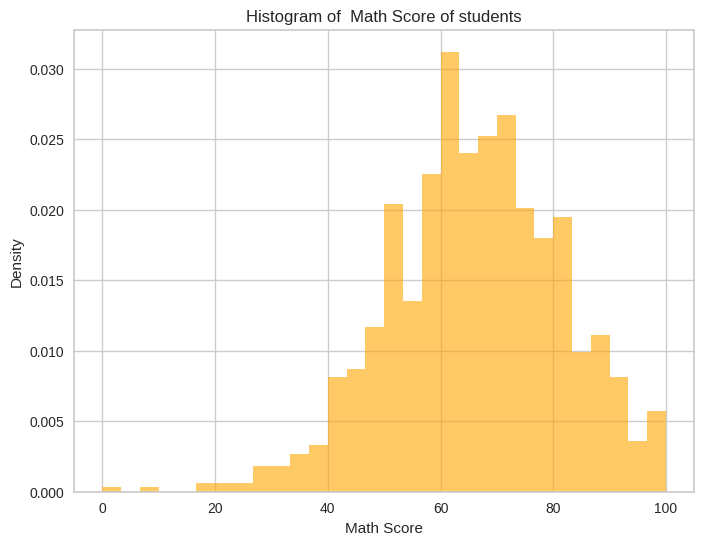

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(df['math score'], bins=30, density=True, alpha=0.6, color='orange')
plt.title('Histogram of  Math Score of students')
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()

 The graph shows  symmetry with longer tails on the left indicating left skewedness and leptokurtic in nature, we can also observe that maximum students have scored marks between 40-80

In [19]:
# Calculate mean, standard deviation, skewness, and kurtosis for math score
mean_math = np.mean(df['math score'])
std_dev_math = np.std(df['math score'])
skewness_math = np.mean((df['math score'] - mean_math) ** 3) / (std_dev_math ** 3)
kurtosis_math = np.mean((df['math score'] - mean_math) ** 4) / (std_dev_math ** 4) - 3

# Calculate mean, standard deviation, skewness, and kurtosis for reading score
mean_reading = np.mean(df['reading score'])
std_dev_reading = np.std(df['reading score'])
skewness_reading = np.mean((df['reading score'] - mean_reading) ** 3) / (std_dev_reading ** 3)
kurtosis_reading = np.mean((df['reading score'] - mean_reading) ** 4) / (std_dev_reading ** 4) - 3

# Calculate mean, standard deviation, skewness, and kurtosis for writing score
mean_writing = np.mean(df['writing score'])
std_dev_writing = np.std(df['writing score'])
skewness_writing = np.mean((df['writing score'] - mean_writing) ** 3) / (std_dev_writing ** 3)
kurtosis_writing = np.mean((df['writing score'] - mean_writing) ** 4) / (std_dev_writing ** 4) - 3

# Print descriptive statistics for each subject
print("Descriptive Statistics:")
print("Math Score:")
print(f"Mean: {mean_math:.2f}")
print(f"Standard Deviation: {std_dev_math:.2f}")
print(f"Skewness: {skewness_math:.2f}")
print(f"Kurtosis: {kurtosis_math:.2f}")

print("\nReading Score:")
print(f"Mean: {mean_reading:.2f}")
print(f"Standard Deviation: {std_dev_reading:.2f}")
print(f"Skewness: {skewness_reading:.2f}")
print(f"Kurtosis: {kurtosis_reading:.2f}")

print("\nWriting Score:")
print(f"Mean: {mean_writing:.2f}")
print(f"Standard Deviation: {std_dev_writing:.2f}")
print(f"Skewness: {skewness_writing:.2f}")
print(f"Kurtosis: {kurtosis_writing:.2f}")


Descriptive Statistics:
Math Score:
Mean: 66.09
Standard Deviation: 15.16
Skewness: -0.28
Kurtosis: 0.27

Reading Score:
Mean: 69.17
Standard Deviation: 14.59
Skewness: -0.26
Kurtosis: -0.07

Writing Score:
Mean: 68.05
Standard Deviation: 15.19
Skewness: -0.29
Kurtosis: -0.04


These descriptive statistics provide insights into the distribution and characteristics of the 'math score', 'reading score', and 'writing score' columns:

1. **Math Score**:
   - **Mean**: The average math score is approximately 66.09.
   - **Standard Deviation**: The standard deviation of math scores is approximately 15.16, indicating a moderate amount of variability in the scores around the mean.
   - **Skewness**: The skewness of math scores is approximately -0.28, suggesting a slight negative skewness. This indicates that the distribution is slightly skewed to the left.
   - **Kurtosis**: The kurtosis of math scores is approximately 0.27, indicating a slightly peaked distribution (leptokurtic) compared to a normal distribution.

2. **Reading Score**:
   - **Mean**: The average reading score is approximately 69.17.
   - **Standard Deviation**: The standard deviation of reading scores is approximately 14.59, indicating a moderate amount of variability in the scores around the mean.
   - **Skewness**: The skewness of reading scores is approximately -0.26, suggesting a slight negative skewness. Similar to math scores, the distribution is slightly skewed to the left.
   - **Kurtosis**: The kurtosis of reading scores is approximately -0.07, indicating a distribution with slightly thinner tails (platykurtic) compared to a normal distribution.

3. **Writing Score**:
   - **Mean**: The average writing score is approximately 68.05.
   - **Standard Deviation**: The standard deviation of writing scores is approximately 15.19, indicating a moderate amount of variability in the scores around the mean.
   - **Skewness**: The skewness of writing scores is approximately -0.29, suggesting a slight negative skewness, similar to math and reading scores.
   - **Kurtosis**: The kurtosis of writing scores is approximately -0.04, indicating a distribution with thinner tails (platykurtic) compared to a normal distribution.

Overall, these statistics provide a summary of the distribution shape, central tendency, and variability of scores in each subject. The skewness and kurtosis values offer insights into the symmetry and peakedness of the distributions, respectively.

<ipython-input-20-cf253aee7db6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['reading score'], color='orange', shade=True)


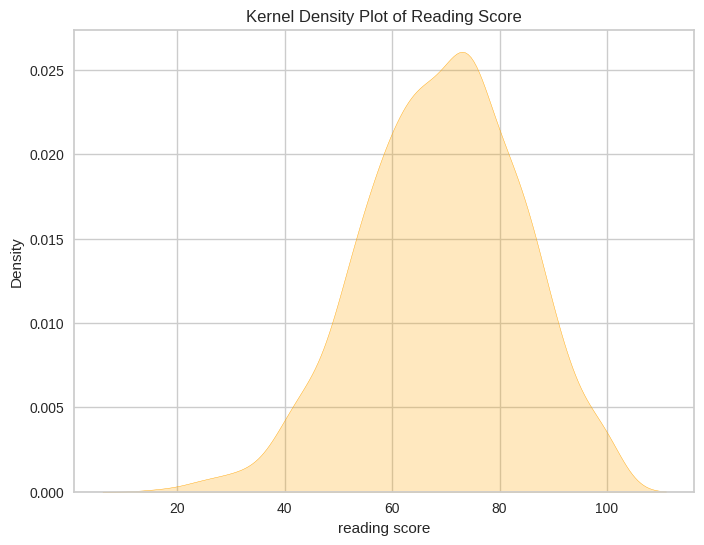

In [20]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['reading score'], color='orange', shade=True)
plt.xlabel('reading score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Reading Score')
plt.show()

The distribution of the reading scores is clearly symmetric but left skewed and platykurtic in nature.

Text(0.5, 1.0, 'QQ Plot of writing score')

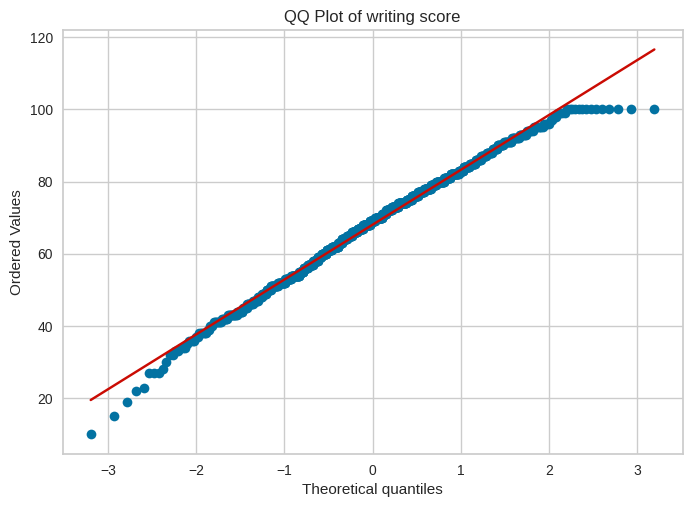

In [21]:
from scipy import stats
stats.probplot(df['writing score'], dist="norm", plot=plt)
plt.title('QQ Plot of writing score')

 The distribution of the writing score is almost normally distributed , but slight variations are evident.

### **Univariate Analysis**

Categorical Variables:

In [22]:
parent_freq = df['parental level of education'].value_counts(normalize=True)
print(parent_freq)

parental level of education
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: proportion, dtype: float64


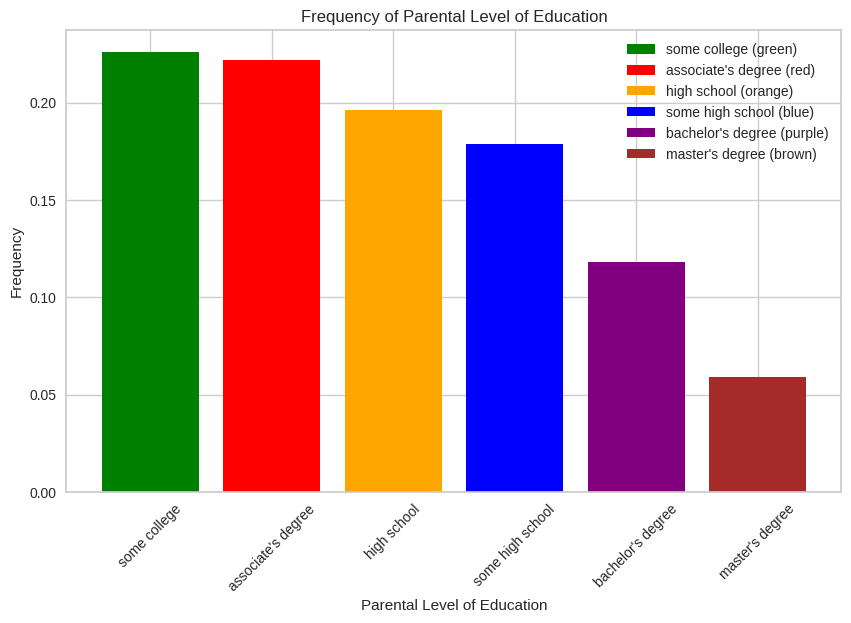

In [23]:
# Define colors for each category of parental level of education
colors = {
    "some high school": "blue",
    "high school": "orange",
    "some college": "green",
    "associate's degree": "red",
    "bachelor's degree": "purple",
    "master's degree": "brown"
}

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(parent_freq.index, parent_freq.values, color=[colors[ple] for ple in parent_freq.index])

# Add labels and title
plt.xlabel('Parental Level of Education')
plt.ylabel('Frequency')
plt.title('Frequency of Parental Level of Education')
plt.xticks(rotation=45)

# Add legend
legend_labels = list(map(lambda x: f"{x} ({colors[x]})", parent_freq.index))
plt.legend(bars, legend_labels)

plt.show()


 The parents of most of the students have a education from some college , and second highest occurrence is for associate's degree and the least occurenece is master's degree

In [24]:
race_freq = df['race/ethnicity'].value_counts(normalize=True)
print(race_freq)



race/ethnicity
group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: proportion, dtype: float64


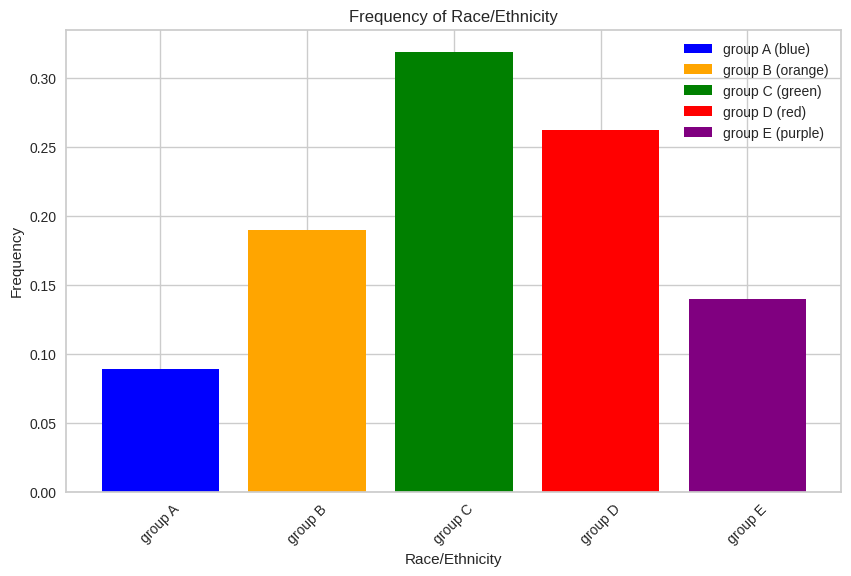

In [25]:
# Define colors for each category of race/ethnicity
colors_race = {
    'group A': 'blue',
    'group B': 'orange',
    'group C': 'green',
    'group D': 'red',
    'group E': 'purple'
}

# Race/ethnicity frequencies
race_freq = {
    'group A': 0.089,
    'group B': 0.190,
    'group C': 0.319,
    'group D': 0.262,
    'group E': 0.140
}

# Create the bar plot for race/ethnicity
plt.figure(figsize=(10, 6))
bars_race = plt.bar(race_freq.keys(), race_freq.values(), color=[colors_race[race] for race in race_freq.keys()])

# Add labels and title for race/ethnicity plot
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Frequency of Race/Ethnicity')
plt.xticks(rotation=45)

# Add legend for race/ethnicity plot
legend_labels_race = list(map(lambda x: f"{x} ({colors_race[x]})", race_freq.keys()))
plt.legend(bars_race, legend_labels_race)

plt.show()


 We clearly see that the maximum number of students  belong to the group C , and the second highest occurence is group d whereas the lowest occurence is group A

In [26]:
gender_freq = df['gender'].value_counts(normalize=True)
print(gender_freq)

gender
female    0.518
male      0.482
Name: proportion, dtype: float64


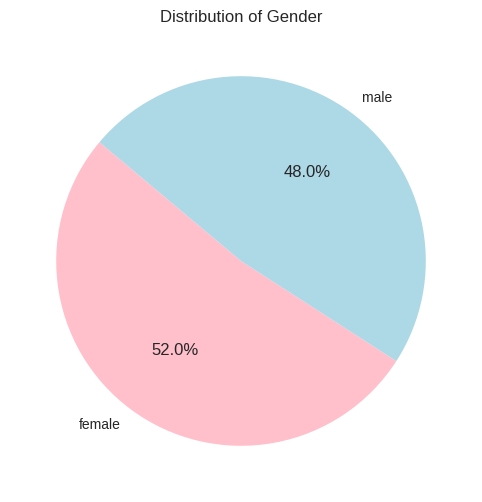

In [27]:


# Gender distribution
gender_distribution = {
    'female': 0.52,
    'male': 0.48
}

# Define colors for each gender
colors_gender = ['pink', 'lightblue']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution.values(), labels=gender_distribution.keys(), autopct='%1.1f%%', colors=colors_gender, startangle=140)
plt.title('Distribution of Gender')
plt.show()


In [28]:
test_freq = df['test preparation course'].value_counts(normalize=True)
print(test_freq)

test preparation course
none         0.642
completed    0.358
Name: proportion, dtype: float64


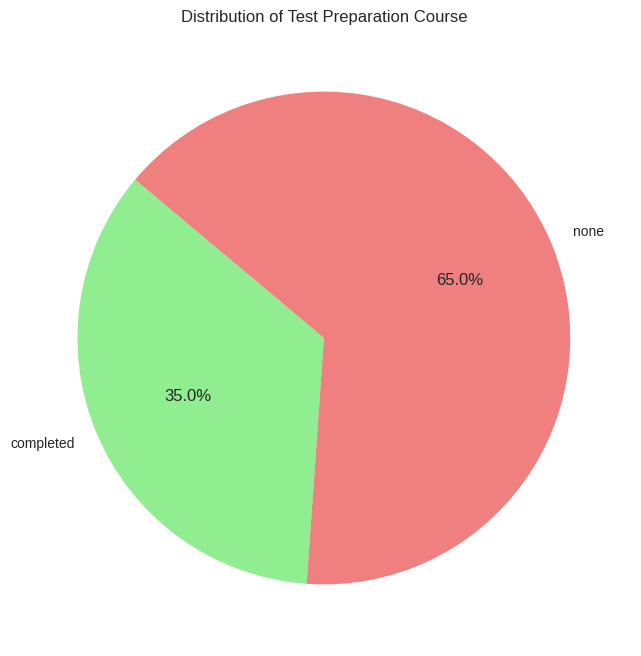

In [29]:
import matplotlib.pyplot as plt

# Test preparation course distribution
test_prep_distribution = {
    'completed': 0.35,
    'none': 0.65
}

# Define colors for each category
colors_test_prep = ['lightgreen', 'lightcoral']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(test_prep_distribution.values(), labels=test_prep_distribution.keys(), autopct='%1.1f%%', colors=colors_test_prep, startangle=140)
plt.title('Distribution of Test Preparation Course')
plt.show()


### **Bivariate Analysis:**

* Explore relationships between pairs of numerical variables:

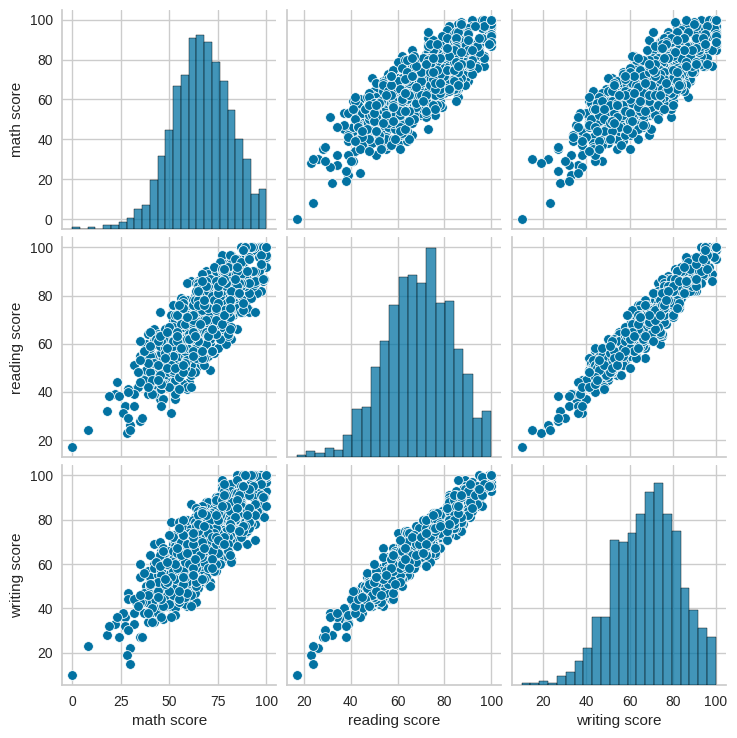

In [30]:
sns.pairplot(df)
plt.show()

In [31]:
scores_subset = df[['math score', 'reading score', 'writing score']]

# Calculate the correlation matrix
correlation_matrix = scores_subset.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


The correlation matrix provided shows the correlation coefficients between pairs of variables, specifically the 'math score', 'reading score', and 'writing score'. Here's how to interpret it:

1. **Math Score vs. Reading Score**:
   - The correlation coefficient between math score and reading score is approximately 0.8176.
   - This value indicates a strong positive correlation between math score and reading score.
   - A correlation coefficient close to 1 suggests that as one variable (math score) increases, the other variable (reading score) tends to increase as well, and vice versa.
   - Therefore, students who perform well in math are likely to perform well in reading, and vice versa.

2. **Math Score vs. Writing Score**:
   - The correlation coefficient between math score and writing score is approximately 0.8026.
   - This value indicates a strong positive correlation between math score and writing score.
   - Similar to the correlation with reading score, a correlation coefficient close to 1 suggests that as one variable (math score) increases, the other variable (writing score) tends to increase as well, and vice versa.
   - Therefore, students who perform well in math are likely to perform well in writing, and vice versa.

3. **Reading Score vs. Writing Score**:
   - The correlation coefficient between reading score and writing score is approximately 0.9546.
   - This value indicates a very strong positive correlation between reading score and writing score.
   - A correlation coefficient close to 1 suggests that as one variable (reading score) increases, the other variable (writing score) tends to increase as well, and vice versa.
   - Therefore, students who perform well in reading are highly likely to perform well in writing, and vice versa.

Overall, the correlation matrix reveals strong positive correlations between all pairs of scores, indicating that students who excel in one subject tend to excel in others as well.

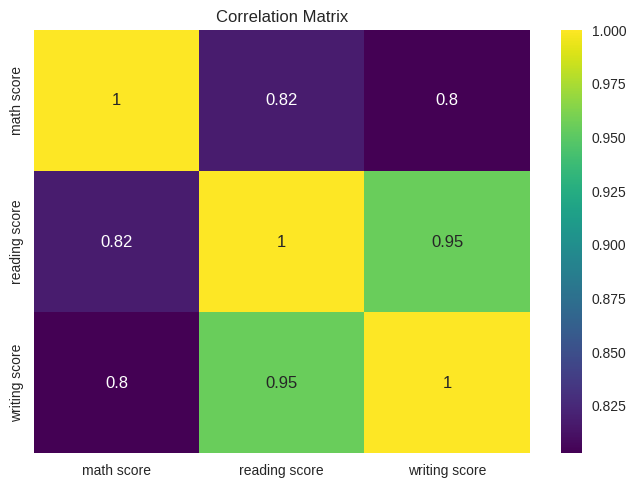

In [32]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

# **LDA**

In [33]:
# Define the passing score threshold
passing_score_threshold = 60  # You can adjust this threshold as needed

# Function to classify students as pass (1) or fail (0)
def classify_pass_fail(row):
    if row['math score'] >= passing_score_threshold and \
       row['reading score'] >= passing_score_threshold and \
       row['writing score'] >= passing_score_threshold:
        return 1  # Pass
    else:
        return 0  # Fail

# Apply the function to each row to create pass/fail column
df['pass_fail'] = df.apply(classify_pass_fail, axis=1)

# Display the updated dataset
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  pass_fail  
0                    none          72             72             74          1  
1               completed          69             90             88          1  
2                    none          90             95             93          1  
3                    none          47             57             44          0  
4                    none          76             78             75          1  


#  Separate features (X) and target variable (y)

In [41]:
X = df[['math score', 'reading score', 'writing score']]
Y = df['pass_fail']


0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: pass_fail, Length: 1000, dtype: int64

#  Perform Standardization on features

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the dataset into training and testing sets

In [37]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Implement Linear Discriminant Analysis (LDA)

In [38]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Assuming 'lda_model' is your trained LDA model and 'X_test', 'Y_test' are your test data
Y_pred = lda_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, Y_pred)

# Precision
precision = precision_score(y_test, Y_pred, average='macro')


# Recall
recall = recall_score(y_test, Y_pred, average='macro')

# F1 Score
f1 = f1_score(y_test, Y_pred, average='macro')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, Y_pred)

# ROC AUC Score (if applicable)
# roc_auc = roc_auc_score(Y_test, Y_pred_proba)  # Uncomment this line if you have predicted probabilities

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.96
Precision: 0.9605911330049262
Recall: 0.9577723378212974
F1 Score: 0.959079283887468
Confusion Matrix:
 [[ 81   5]
 [  3 111]]



- **Accuracy**: The model's accuracy is 96%, indicating that it correctly predicts the class label for 96% of the instances in the test set.
- **Precision**: The precision of the model is approximately 96.06%. Precision measures the proportion of true positive predictions out of all positive predictions made by the model. A high precision indicates that the model has a low false positive rate.
- **Recall**: The recall (also known as sensitivity or true positive rate) of the model is approximately 95.78%. Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset. A high recall indicates that the model can capture most of the positive instances.
- **F1 Score**: The F1 score, which is the harmonic mean of precision and recall, is approximately 95.91%. It provides a balance between precision and recall and is particularly useful when classes are imbalanced.
- **Confusion Matrix**: The confusion matrix shows the count of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions made by the model. In this case, there are 81 true negatives, 111 true positives, 5 false positives, and 3 false negatives.

Overall, the model performs well with high accuracy, precision, recall, and F1 score. It correctly identifies the majority of instances in the dataset and has a low rate of false positives and false negatives. However, further analysis and validation may be necessary depending on the specific requirements and context of the classification task.

In [40]:
from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        86
           1       0.96      0.97      0.97       114

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



The  classification report provides a detailed summary of the model's performance:

- **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. In this report, the precision for class 0 (fail) is 96% and for class 1 (pass) is 96%. This indicates that the model has a high precision for both classes, with a low rate of false positive predictions.

- **Recall**: Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions out of all actual positive instances in the dataset. In this report, the recall for class 0 is 94% and for class 1 is 97%. This indicates that the model can capture the majority of positive instances for both classes, with a slightly higher recall for class 1.

- **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. In this report, the F1-score for class 0 is 95% and for class 1 is 97%. This indicates that the model achieves a good balance between precision and recall for both classes.

- **Support**: Support refers to the number of occurrences of each class in the dataset. In this report, there are 86 instances of class 0 (fail) and 114 instances of class 1 (pass).

- **Accuracy**: Accuracy measures the overall correctness of the model's predictions. In this report, the accuracy of the model is 96%, indicating that it correctly predicts the class labels for 96% of the instances in the test set.

- **Macro avg and weighted avg**: These are the average values of precision, recall, and F1-score calculated across all classes. The macro avg gives equal weight to each class, while the weighted avg takes into account the class imbalance by weighting each class's score by its support.

Overall, the model performs well with high precision, recall, and F1-score for both classes, as well as high accuracy.

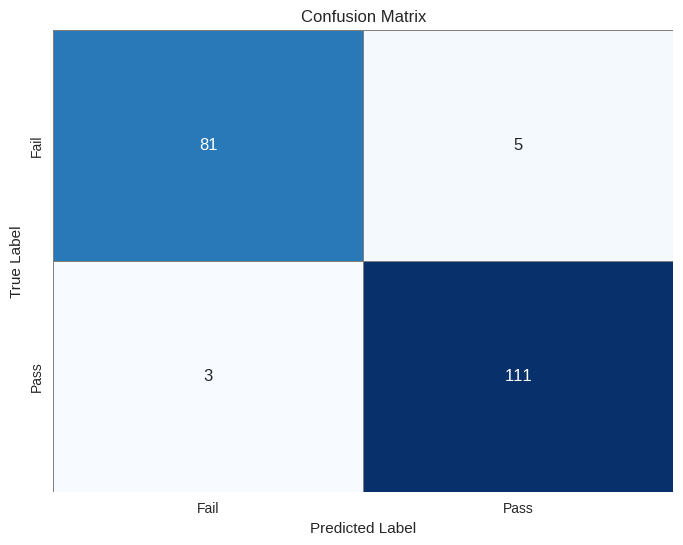

In [42]:
conf_matrix = confusion_matrix(y_test, Y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='grey',
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot the data points in the reduced-dimensional space

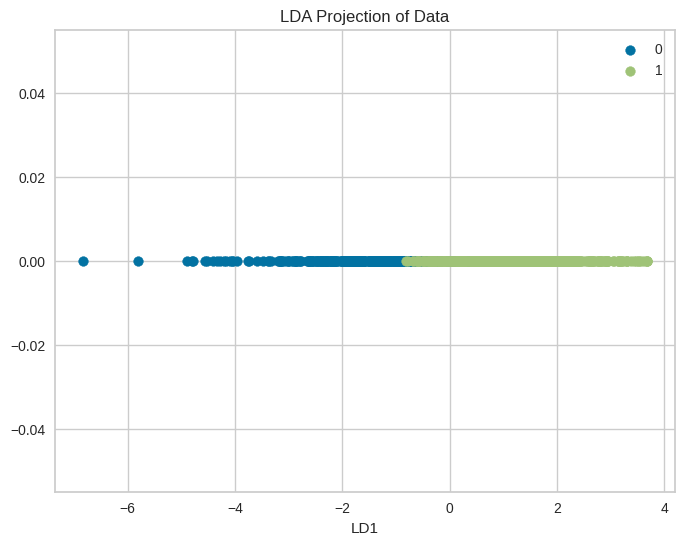

In [43]:
X_lda = lda_model.fit_transform(X, Y)
plt.figure(figsize=(8, 6))
for label in set(Y):
    plt.scatter(X_lda[Y == label, 0], [0]*sum(Y == label), label=label)
plt.xlabel('LD1')
plt.title('LDA Projection of Data')
plt.legend()
plt.show()

#  Implement Logistic Regression

In [44]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

# Display classification report and confusion matrix for Logistic Regression

In [45]:
y_pred_log = log_reg_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        86
           1       0.97      0.97      0.97       114

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
[[ 82   4]
 [  3 111]]


**Classification Report**
The classification report offers an overview of the model's performance:

- **Precision**: Precision measures the accuracy of positive predictions. For class 0 (fail), the precision is 96%, indicating that 96% of instances predicted as fail are actually fail. For class 1 (pass), the precision is 97%, indicating that 97% of instances predicted as pass are actually pass.

- **Recall**: Recall (also known as sensitivity) measures the proportion of actual positives that were correctly predicted by the model. For class 0, the recall is 95%, indicating that the model correctly identifies 95% of the fail instances. For class 1, the recall is 97%, indicating that the model correctly identifies 97% of the pass instances.

- **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. For class 0, the F1-score is 96%, and for class 1, the F1-score is 97%.

- **Support**: Support refers to the number of instances of each class in the dataset. There are 86 instances of class 0 (fail) and 114 instances of class 1 (pass).

- **Accuracy**: The accuracy of the model is 96%, indicating that it correctly predicts the class labels for 96% of the instances in the test set.

- **Macro avg and weighted avg**: These are the average values of precision, recall, and F1-score across all classes. The macro avg gives equal weight to each class, while the weighted avg takes into account the class imbalance by weighting each class's score by its support.

Overall, the model demonstrates strong performance with high precision, recall, and F1-score for both classes, as well as high accuracy.

**Confusion Matrix**


The  confusion matrix represents the counts of true positive, false positive, true negative, and false negative predictions made by the model:

* True Positive (TP): Instances that are actually positive (class 1, pass) and are correctly predicted as positive. In this case, there are 111 true positives.
* False Positive (FP): Instances that are actually negative (class 0, fail) but are incorrectly predicted as positive. In this case, there are 4 false positives.
* True Negative (TN): Instances that are actually negative and are correctly predicted as negative. In this case, there are 82 true negatives.
* False Negative (FN): Instances that are actually positive but are incorrectly predicted as negative. In this case, there are 3 false negatives.

# Visualize confusion matrix

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


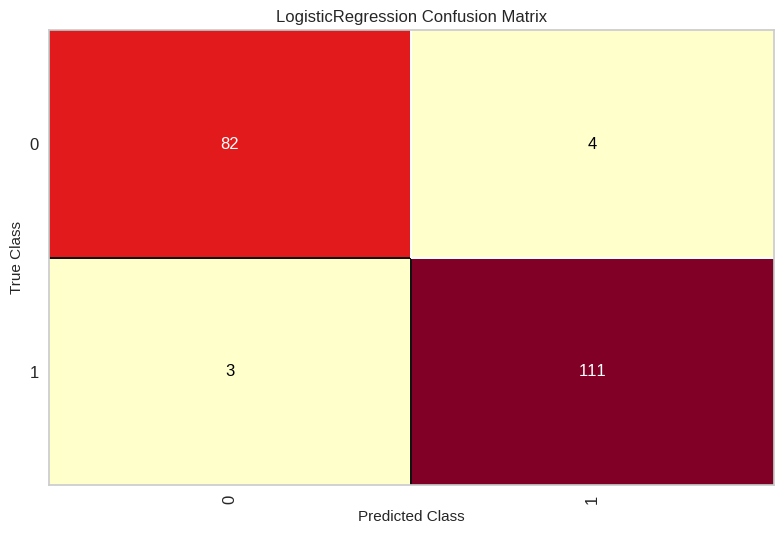

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [47]:

cm = ConfusionMatrix(log_reg_model, classes=np.unique(Y))
cm.score(X_test, y_test)
cm.show()

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score



# Accuracy
accuracy = accuracy_score(y_test, y_pred_log)

# Precision
precision = precision_score(y_test, y_pred_log, average='macro')


# Recall
recall = recall_score(y_test,y_pred_log, average='macro')

# F1 Score
f1 = f1_score(y_test, y_pred_log, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.965
Precision: 0.9649616368286444
Recall: 0.9635862913096696
F1 Score: 0.9642483209479302


The  metrics offer an assessment of the model's performance:

- **Accuracy**: The model achieves an accuracy of 96.5%, indicating that it correctly predicts the class labels for 96.5% of the instances in the test set.

- **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. In this case, the precision is approximately 96.5%, indicating that 96.5% of instances predicted as positive are actually positive.

- **Recall**: Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions out of all actual positive instances in the dataset. The recall of the model is approximately 96.4%, indicating that the model can capture 96.4% of the positive instances.

- **F1 Score**: The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. It is approximately 96.4%, suggesting a good balance between precision and recall.

Overall, the model demonstrates strong performance with high accuracy, precision, recall, and F1 score. It effectively identifies the majority of instances in the dataset, with a low rate of false positives and false negatives.

# Conclusion

Comparing the results of both models that is LDA and logistic regression model  both models provide almost very similar results , with slight  differences . Using LDA the models had 8 wrong predictions , but using Logistic it is reduced to 7 wrong predictions. The precision for  class 0 (fail) is 96% and for class 1 (pass) is 96%  when LDA was used , but using logistic regression  the precision for class1 (pass) is increased to 97%.For class 0, the F1-score is 96%, and for class 1, the F1-score is 97%. using Logistic regression  is more compared to LDA i,e. The F1-score for class 0 is 95% and for class 1 is 97%. Hence with very minimum variations in the result we can conclude that the logistic regression model is best suitable for this dataset.